Mean Absolute Error: 970043.40
Mean Squared Error: 1754318687330.66
R² Score: 0.6529
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


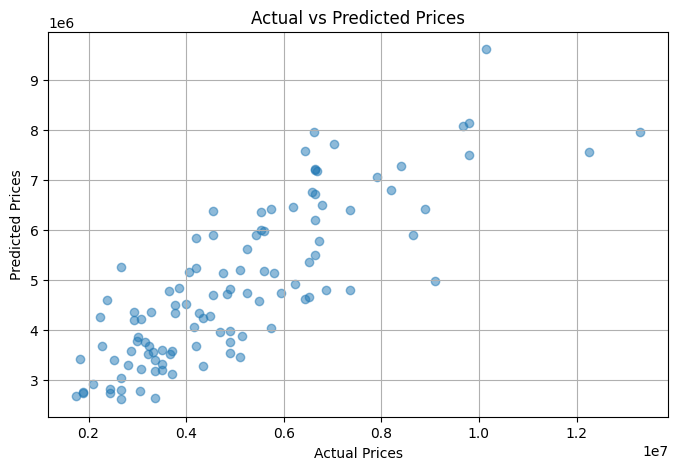

In [4]:
# task3_linear_regression.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv(r"D:\ML PROJECTS\elevate labs intenship\task 3\Housing.csv")

# 2. Data Preprocessing
# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Split features & target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# 8. Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)

# 9. Plot Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# 10. Save Evaluation Summary
with open("evaluation.txt", "w") as f:
    f.write(f"Mean Absolute Error: {mae:.2f}\n")
    f.write(f"Mean Squared Error: {mse:.2f}\n")
    f.write(f"R² Score: {r2:.4f}\n")
